In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [55]:
df= pd.read_excel('Covid cases in India.xlsx')
df.head()

S. No. Name of State / UT  Total Confirmed cases    Cured  Death
0       1     Andhra Pradesh                2070095  2052718  14416
1       2      Chhattisgarh                 1006386   992543  13588
2       3              Delhi                1440440  1415008  25095
3       4            Gujarat                 826979   816654  10090
4       5            Haryana                 771448   761250  10051

In [56]:
df.drop(['S. No.'],axis=1,inplace=True)

In [57]:
df_1 = pd.read_csv('state_wise.csv')

In [58]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Confirmed          38 non-null     int64 
 2   Recovered          38 non-null     int64 
 3   Deaths             38 non-null     int64 
 4   Active             38 non-null     int64 
 5   Last_Updated_Time  38 non-null     object
 6   Migrated_Other     38 non-null     int64 
 7   State_code         38 non-null     object
 8   Delta_Confirmed    38 non-null     int64 
 9   Delta_Recovered    38 non-null     int64 
 10  Delta_Deaths       38 non-null     int64 
 11  State_Notes        14 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.7+ KB


In [59]:
df_2 = pd.read_csv('district_wise.csv')

In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SlNo             802 non-null    int64  
 1   State_Code       802 non-null    object 
 2   State            802 non-null    object 
 3   District_Key     802 non-null    object 
 4   District         802 non-null    object 
 5   Confirmed        802 non-null    int64  
 6   Active           802 non-null    int64  
 7   Recovered        802 non-null    int64  
 8   Deceased         802 non-null    int64  
 9   Migrated_Other   802 non-null    int64  
 10  Delta_Confirmed  802 non-null    int64  
 11  Delta_Active     802 non-null    int64  
 12  Delta_Recovered  802 non-null    int64  
 13  Delta_Deceased   802 non-null    int64  
 14  District_Notes   63 non-null     object 
 15  Last_Updated     0 non-null      float64
dtypes: float64(1), int64(10), object(5)
memory usage: 100.4+ KB


In [61]:
df_3 = pd.read_csv('vaccine_doses_statewise_v2.csv')

In [62]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906 entries, 0 to 10905
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Vaccinated As of          10905 non-null  object 
 1   State                     10905 non-null  object 
 2   First Dose Administered   10905 non-null  float64
 3   Second Dose Administered  10905 non-null  float64
 4   Total Doses Administered  10905 non-null  float64
dtypes: float64(3), object(2)
memory usage: 426.1+ KB


In [63]:
df_4 = pd.read_csv('state_wise_daily.csv')

In [64]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1791 non-null   object
 1   Date_YMD  1791 non-null   object
 2   Status    1791 non-null   object
 3   TT        1791 non-null   int64 
 4   AN        1791 non-null   int64 
 5   AP        1791 non-null   int64 
 6   AR        1791 non-null   int64 
 7   AS        1791 non-null   int64 
 8   BR        1791 non-null   int64 
 9   CH        1791 non-null   int64 
 10  CT        1791 non-null   int64 
 11  DN        1791 non-null   int64 
 12  DD        1791 non-null   int64 
 13  DL        1791 non-null   int64 
 14  GA        1791 non-null   int64 
 15  GJ        1791 non-null   int64 
 16  HR        1791 non-null   int64 
 17  HP        1791 non-null   int64 
 18  JK        1791 non-null   int64 
 19  JH        1791 non-null   int64 
 20  KA        1791 non-null   int64 
 21  KL        1791

In [65]:
India_coord = pd.read_excel('Indian Coordinates.xlsx')
dbd_India = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')

In [66]:
df.style.background_gradient(cmap='Reds')

In [67]:
df['Total Active'] = df['Total Confirmed cases'] - df['Death'] - df['Cured']
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 127628


In [101]:
Active = int(df_1[df_1['State_code'] == 'TT'].Active)
Recovered = int(df_1[df_1['State_code'] == 'TT'].Recovered)
Deaths = int(df_1[df_1['State_code'] == 'TT'].Deaths)
Confirmed = int(df_1[df_1['State_code'] == 'TT'].Confirmed)

In [107]:
bar_data = [Confirmed ,Active, Recovered, Deaths]
label = ["Confirmed","Active", "Recovered", "Deaths"]

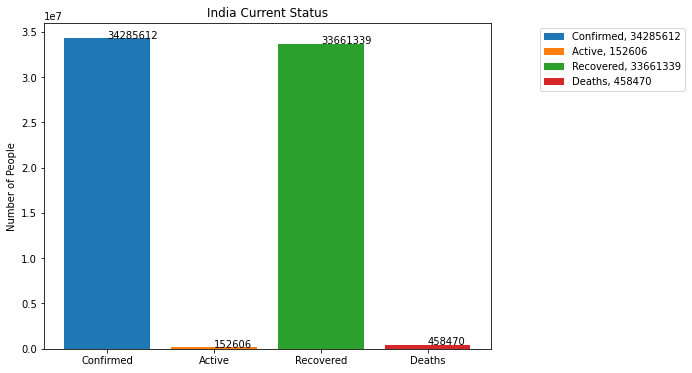

In [108]:
plt.figure("India Current Status Bar Plot", figsize = (8, 6))
plt.bar('Confirmed', Confirmed)
plt.bar('Active', Active)
plt.bar('Recovered', Recovered)
plt.bar('Deaths', Deaths)
labels = [f'{l}, {s:}' for l, s in zip(label, bar_data)]
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', labels=labels)
plt.title("India Current Status")
plt.ylabel('Number of People')
plt.text('Confirmed', Confirmed, str(Confirmed))
plt.text('Active', Active, str(Active))
plt.text('Recovered', Recovered, str(Recovered))
plt.text('Deaths', Deaths, str(Deaths))
plt.show()

In [123]:
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name, death, recovered, active in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Confirmed cases'], df_full['Name of State / UT'], df_full['Death'], df_full['Cured'],df_full['Total Active']):
    folium.CircleMarker([lat, lon], radius=active*0.00125, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>' + '<br>''<strong>Total Deaths</strong>: ' + str(death) + '<br>' + '<br>''<strong>Total Active</strong>: ' + str(active) + '<br>' + '<br>''<strong>Total Recovered</strong>: ' + str(recovered) + '<br>'), color='red',fill_color='red',fill_opacity=0.1 ).add_to(map)
map

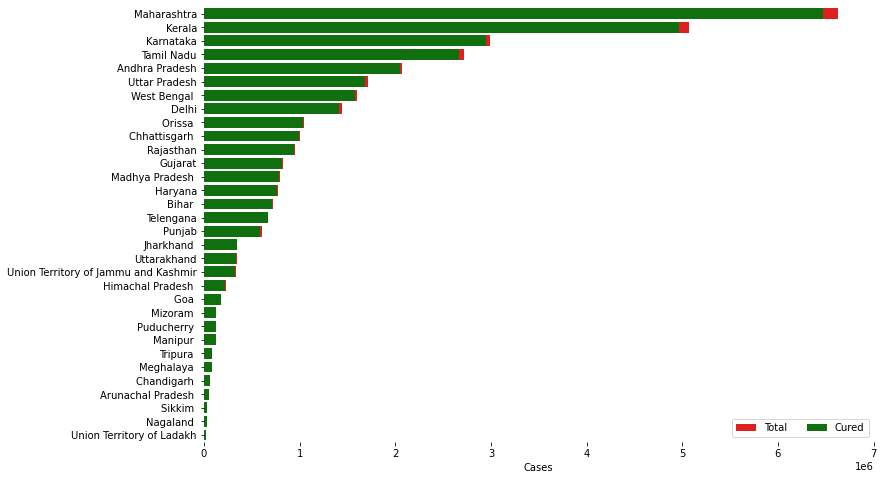

In [69]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total Confirmed cases','Cured','Death']]
data.sort_values('Total Confirmed cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Confirmed cases", y="Name of State / UT", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="green")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [70]:
import plotly
plotly.io.renderers.default = 'colab'

In [71]:
cts_India = pd.read_csv('/content/case_time_series.csv',parse_dates=True)

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cts_India['Date_YMD'], y = cts_India['Total Confirmed'], mode='lines+markers',name='Total Confirmed Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [73]:
fig = px.bar(cts_India, x="Date", y="Total Confirmed", color='Total Confirmed', orientation='v', height=600, title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [99]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cts_India['Date_YMD'], y = cts_India['Daily Confirmed'], mode='lines+markers',name='Daily Confirmed Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India',plot_bgcolor='rgb(230, 230, 230)')
fig.show()
# New COVID-19 cases reported daily in India
import plotly.express as px
fig = px.bar(cts_India, x="Date_YMD", y="Daily Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [75]:
confirmed = cts_India.groupby('Date').sum()['Total Confirmed'].reset_index()
deaths = cts_India.groupby('Date').sum()['Total Deceased'].reset_index()
recovered = cts_India.groupby('Date').sum()['Total Recovered'].reset_index()

In [76]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Total Deceased'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Total Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='COVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [125]:
world = pd.read_csv('/content/WHO-COVID-19-global-data.csv')

In [126]:
world.head()

date Country_code  ... New_deaths Cumulative_deaths
0  03/01/2020           AF  ...          0                 0
1  04/01/2020           AF  ...          0                 0
2  05/01/2020           AF  ...          0                 0
3  06/01/2020           AF  ...          0                 0
4  07/01/2020           AF  ...          0                 0

[5 rows x 8 columns]

In [127]:
df2 = world.groupby(["date", "Country"])[['date','Country', 'New_cases','New_deaths']].sum().reset_index()
df2.head()

date         Country  New_cases  New_deaths
0  01/01/2021     Afghanistan        183          12
1  01/01/2021         Albania        589           7
2  01/01/2021         Algeria        299           5
3  01/01/2021  American Samoa          0           0
4  01/01/2021         Andorra         66           0

In [128]:
world.query('Country=="India"').groupby("date")[['New_cases', 'New_deaths']].sum().reset_index()

date  New_cases  New_deaths
0    01/01/2021      20035         256
1    01/02/2020          0           0
2    01/02/2021      11427         118
3    01/03/2020          0           0
4    01/03/2021      15510         106
..          ...        ...         ...
682  31/08/2020      78512         971
683  31/08/2021      30941         350
684  31/10/2020      48268         551
685  31/10/2021      12830         446
686  31/12/2020      21822         299

[687 rows x 3 columns]

In [129]:
world.groupby('date').sum().head()

New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
date                                                                  
01/01/2021     759525          83620307       13881            1915145
01/02/2020       2110             11963          46                259
01/02/2021     459496         103078074       11737            2344078
01/03/2020       1836             87144          47               2982
01/03/2021     357271         113989157        7734            2649561

In [130]:
confirmed = world.groupby('date').sum()['New_cases'].reset_index()
deaths = world.groupby('date').sum()['New_deaths'].reset_index()

In [135]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['New_cases'], mode='markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['New_deaths'], mode='markers', name='Deaths', line=dict(color='Red', width=1)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

In [132]:
df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

In [85]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = world.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country"])

In [86]:
fig = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Country", hover_data=["New_cases","New_deaths"], animation_frame="date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()